<a href="https://colab.research.google.com/github/Yeeun16/class2019Spring_/blob/master/minist_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip help install


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

Description:
  Install packages from:
  
  - PyPI (and other indexes) using requirement specifiers.
  - VCS project urls.
  - Local project directories.
  - Local or remote source archives.
  
  pip also supports installing from "requirements files", which provide
  an easy way to specify a whole environment to be installed.

Install Options:
  -r, --requirement <file>
  Install
  from the
  given requi
  rements
  file. This
  option can
  be used
  multiple
  times.
  -c, --constraint <file>
  Constrain
  versions
  using the
  given
  constraints
  file. This
  option can
  be used
  multiple
  times.
  --no-deps
  Don't
  install
  package dep
  endencies.
  --pre
  I

In [0]:
# TensorFlow and tf.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import tensorflow

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow일 경우에 Sequential을 쓰고 싶으면

model = tf.keras.models.Sequential([

tf.keras.datasets.mnist.load_data() 에서 mnist.load_data()만 쓰고 싶으면 
import tensorflow 
from tensorflow.keras.datasets import mnist 로 써주어야한다

import tensorflow 가 입력되어있어야 tf.keras.datasets.mnist.load_data()를 쓸 수 있는 것임

In [0]:
(x_train, y_train),(x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

값의 범위를 0에서 1사이로 조정하기 위해 0부터 255까지의 숫자를 255로 나누어준다. train set과 test set에 모두 적용한다.


 x_train, x_test = x_train / 255.0, x_test / 255.0

In [23]:
x_train.shape

(60000, 28, 28)

In [26]:
y_train.shape

(60000,)

x_train 의 크기를 알고 싶으면 shape을 쓰면된다

x_train.shape
(60000, 28, 28) 총 6만개, dimension은 28*28
60000*28*28

y_train.shape
(60000,) 괄호는 튜플. 왜 (60000,)? (60000)과 같다. 왜 , 를 입력하는지? (숫자)이면 튜플이아니고 숫자로 인식된다 그래서 ,를 입력해준다 element가 1개일때 튜플로 지정하기 위해
y_train에 들어있는 정보는 총 6만개의 숫자이다 

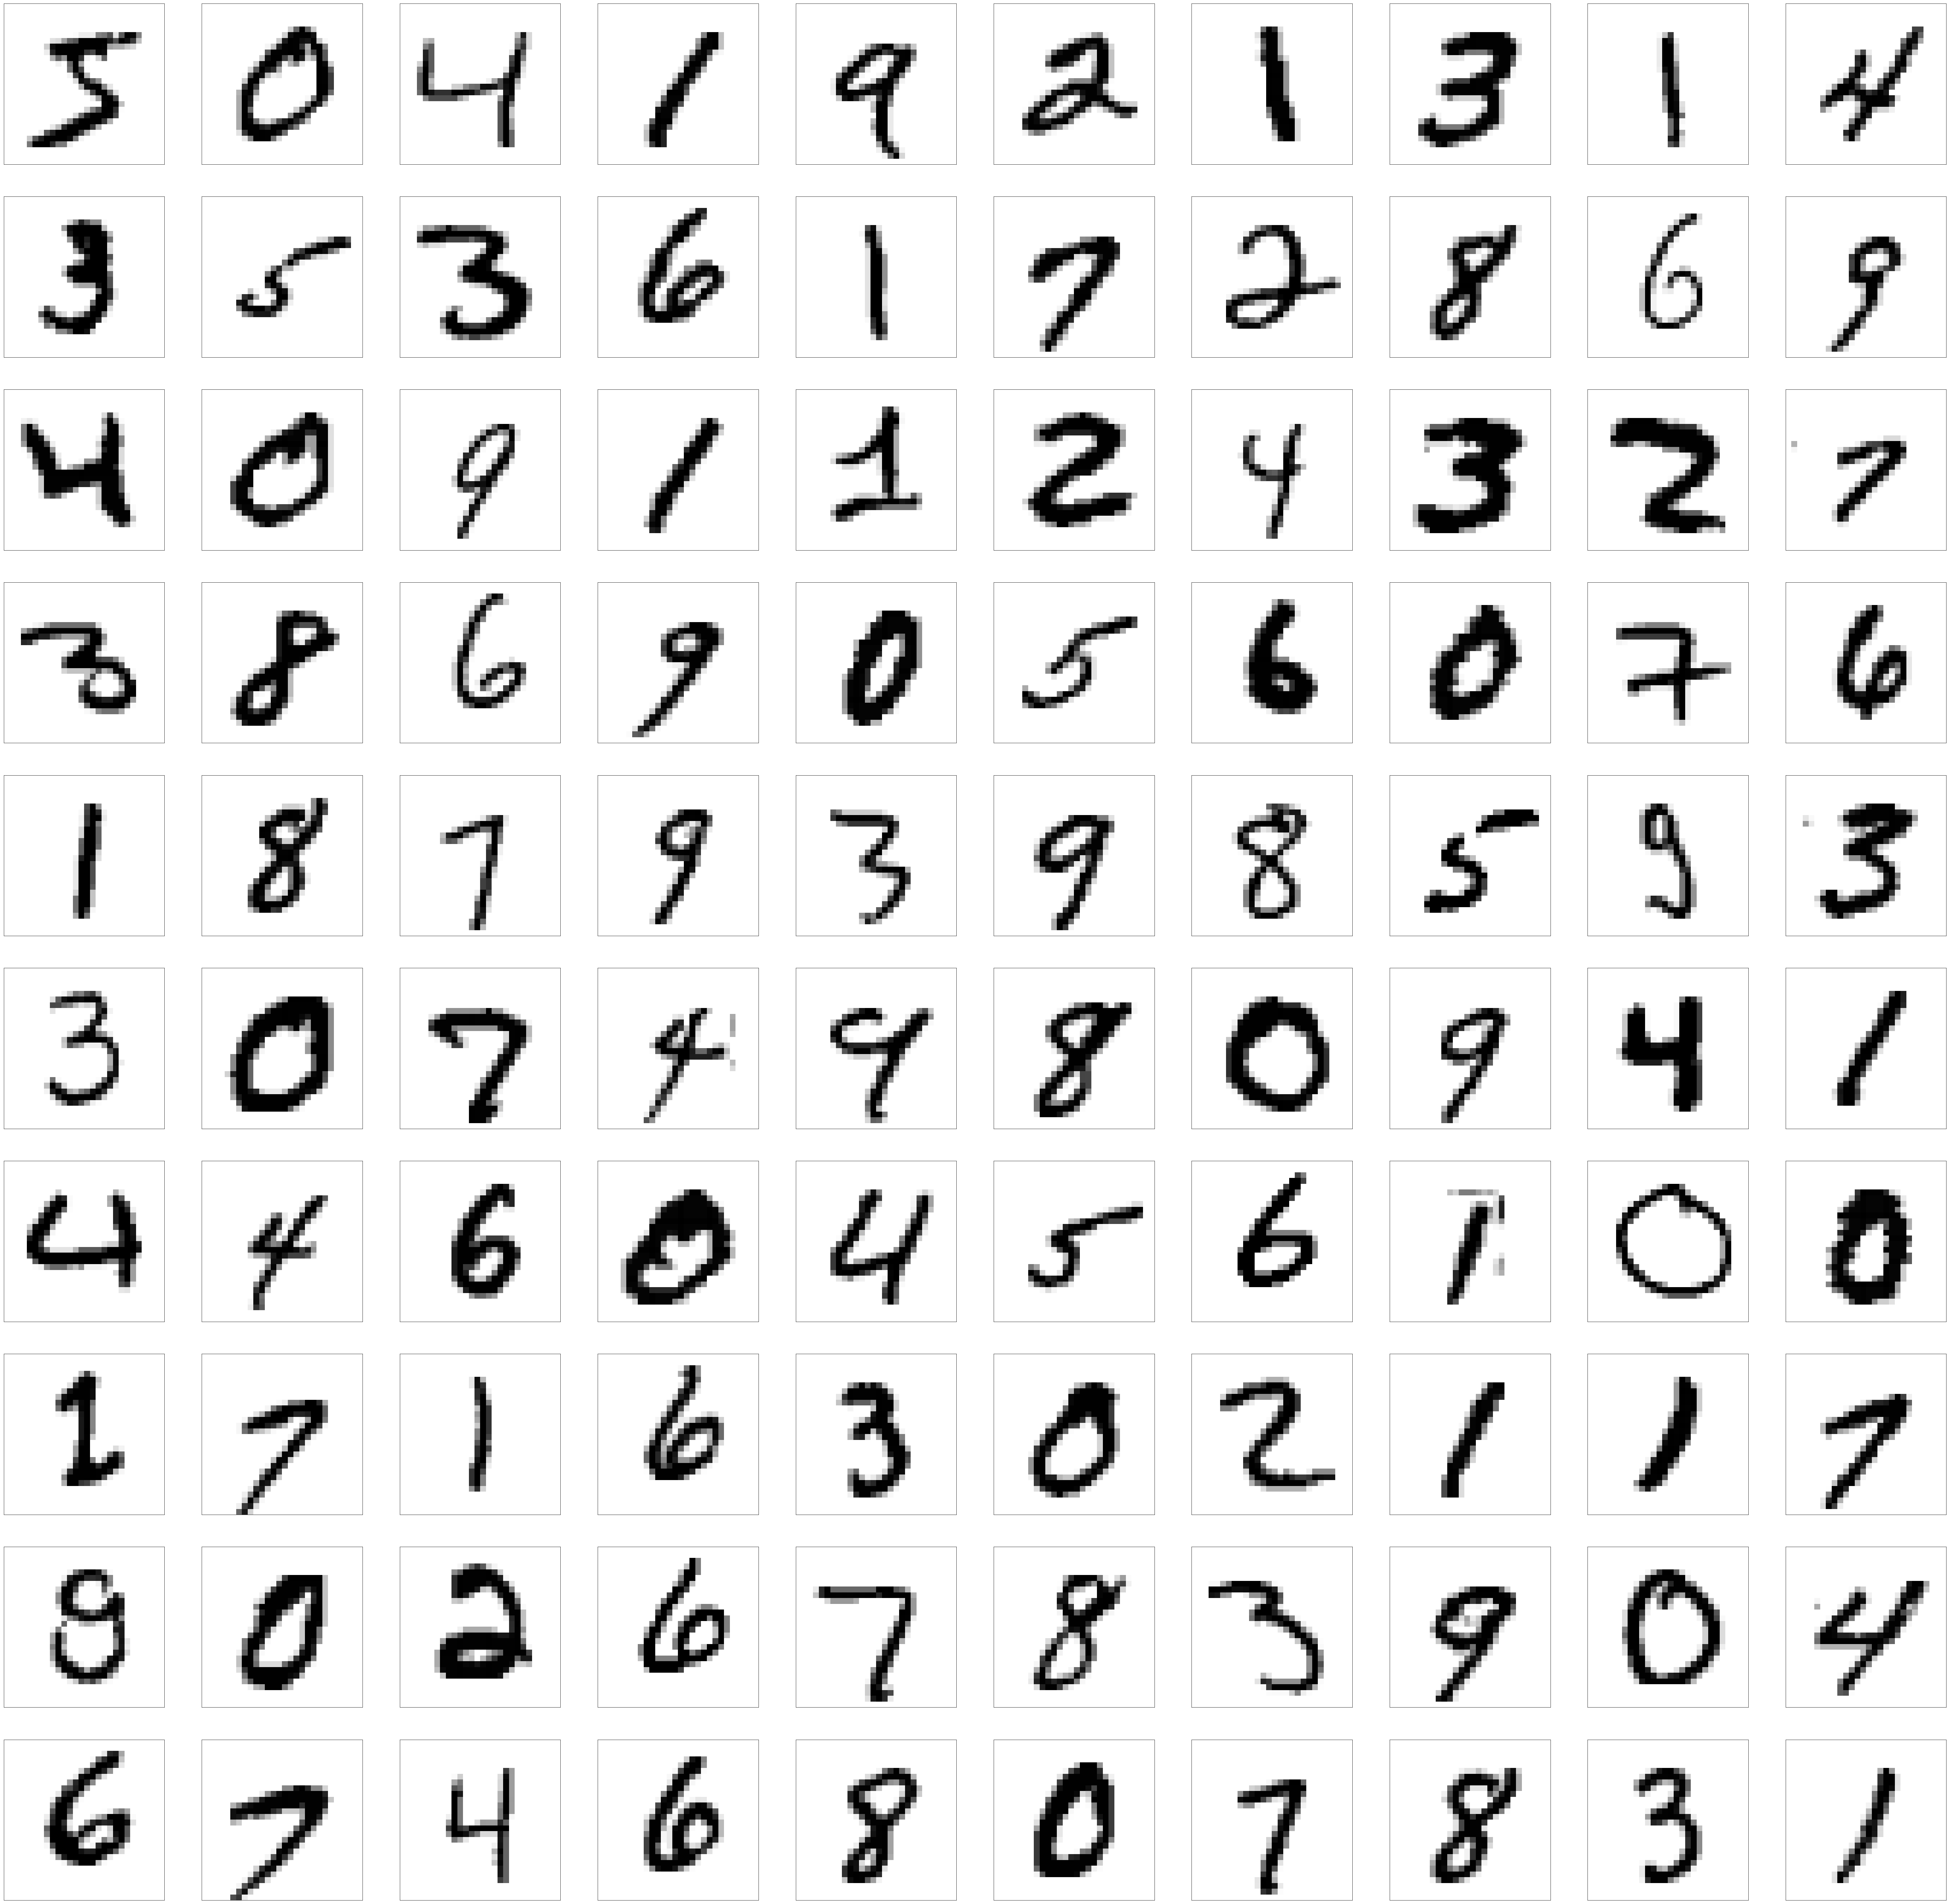

In [22]:
plt.figure(figsize=(100, 100))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()  
  

100개의 이미지 출력

In [0]:
img_rows = 28
img_cols = 28

model = Sequential()
model.add(Flatten(input_shape=(img_rows, img_cols)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.add(Flatten(input_shape=(img_rows, img_cols))) 은 2차원배열(28*28)의 이미지 포맷을 (28*28=784 픽셀의)1차원 배열로 전환한다.
첫 번째 Dense 층은 512개의 nod를 가진다. 두 번째 (마지막) 층은 10개의 nod의 softmax층이다. 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1이다. 각 nod는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력한다.

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
Adam = tensorflow.keras.optimizers.Adam
model.compile(optimizer = Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

lr=0.001 의 lr은 learning rate이다.
Optimizer-데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정한다.
Loss function-훈련 하는 동안 모델의 오차를 측정한다.
지표(Metrics)-훈련 단계와 테스트 단계를 모니터링하기 위해 사용한다.  다음 예에서는 올바르게 분류된 이미지의 비율인 정확도(accuracy)를 사용한다.

In [31]:
print(model.input_shape)
print(model.output_shape)

(None, 28, 28)
(None, 10)


In [32]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 12s 258us/sample - loss: 0.2239 - acc: 0.9341 - val_loss: 0.1249 - val_acc: 0.9607
Epoch 2/10
48000/48000 [==============================] - 11s 236us/sample - loss: 0.0902 - acc: 0.9725 - val_loss: 0.0916 - val_acc: 0.9705
Epoch 3/10
48000/48000 [==============================] - 12s 240us/sample - loss: 0.0569 - acc: 0.9827 - val_loss: 0.0796 - val_acc: 0.9761
Epoch 4/10
48000/48000 [==============================] - 12s 249us/sample - loss: 0.0412 - acc: 0.9871 - val_loss: 0.0815 - val_acc: 0.9767
Epoch 5/10
48000/48000 [==============================] - 12s 245us/sample - loss: 0.0306 - acc: 0.9904 - val_loss: 0.0911 - val_acc: 0.9742
Epoch 6/10
48000/48000 [==============================] - 12s 248us/sample - loss: 0.0213 - acc: 0.9933 - val_loss: 0.0779 - val_acc: 0.9793
Epoch 7/10
48000/48000 [==============================] - 12s 251us/sample - loss: 0.0167 - acc: 0.9946 

validation-train을 하면서 일종의 테스트를 하는 것
즉, dataset은 trainset, validation, testset으로 구분된다.

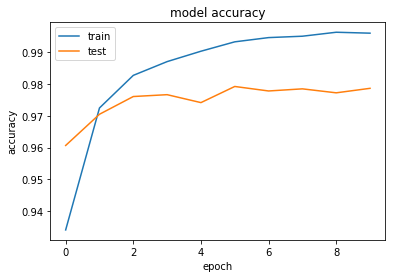

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "uper left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


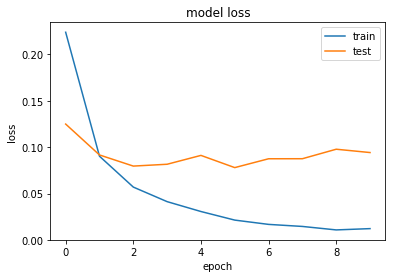

In [34]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='uper left')
plt.show()

훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 overfitting 때문인데,  overfitting은 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상이다. 

In [35]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 60us/sample - loss: 0.0797 - acc: 0.9814


[0.0796816962793524, 0.9814]